In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf


In [25]:
nifty = yf.download("^NSEI", start="2010-01-01")

C:\Users\Hemanshu\AppData\Local\Temp\ipykernel_22224\2576202422.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nifty = yf.download("^NSEI", start="2010-01-01")
[*********************100%***********************]  1 of 1 completed


In [26]:
# Flatten MultiIndex columns
nifty.columns = [col[0] if isinstance(col, tuple) else col for col in nifty.columns]


In [27]:
print(nifty.columns)


Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [28]:
print(nifty)

                   Close          High           Low          Open  Volume
Date                                                                      
2010-01-04   5232.200195   5238.450195   5167.100098   5200.899902       0
2010-01-05   5277.899902   5288.350098   5242.399902   5277.149902       0
2010-01-06   5281.799805   5310.850098   5260.049805   5278.149902       0
2010-01-07   5263.100098   5302.549805   5244.750000   5281.799805       0
2010-01-08   5244.750000   5276.750000   5234.700195   5264.250000       0
...                  ...           ...           ...           ...     ...
2025-12-17  25818.550781  25929.150391  25770.349609  25902.400391  206500
2025-12-18  25815.550781  25902.349609  25726.300781  25764.699219  197600
2025-12-19  25966.400391  25993.349609  25880.449219  25911.500000  382900
2025-12-22  26172.400391  26180.699219  26047.800781  26055.849609  253000
2025-12-23  26177.150391  26233.550781  26119.050781  26205.199219       0

[3924 rows x 5 columns]


In [29]:
nifty.head()

,Close,High,Low,Open,Volume
Date,,,,,
2010-01-04,5232.200195,5238.450195,5167.100098,5200.899902,0
2010-01-05,5277.899902,5288.350098,5242.399902,5277.149902,0
2010-01-06,5281.799805,5310.850098,5260.049805,5278.149902,0
2010-01-07,5263.100098,5302.549805,5244.750000,5281.799805,0
2010-01-08,5244.750000,5276.750000,5234.700195,5264.250000,0


In [31]:
# Keep Close price
nifty = nifty[['Close']]

# Rename for convenience
nifty.rename(columns={'Close': 'price'}, inplace=True)

# Drop missing values
nifty.dropna(inplace=True)

nifty.head()


,price
Date,
2010-01-04,5232.200195
2010-01-05,5277.899902
2010-01-06,5281.799805
2010-01-07,5263.100098
2010-01-08,5244.750000


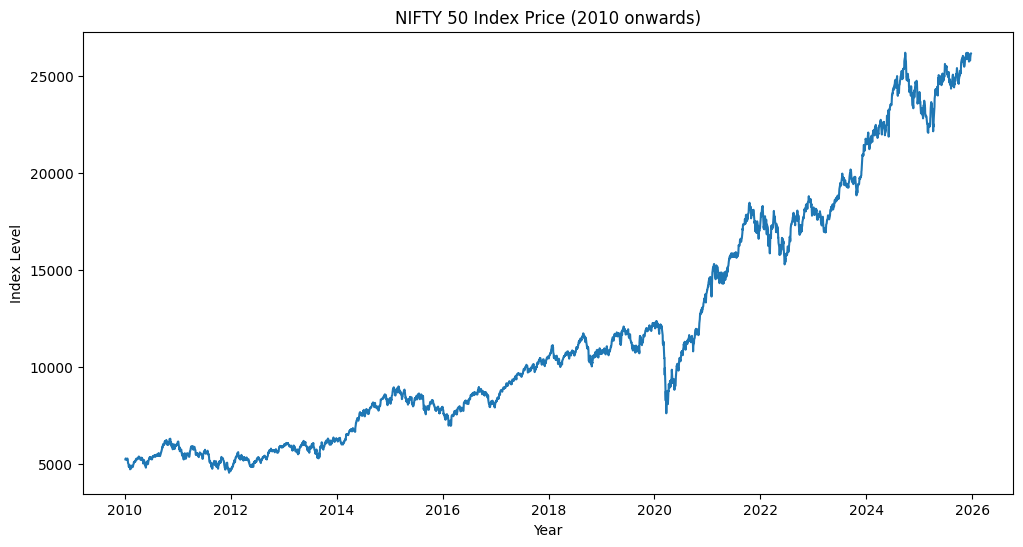

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(nifty.index, nifty['price'])
plt.title("NIFTY 50 Index Price (2010 onwards)")
plt.xlabel("Year")
plt.ylabel("Index Level")
plt.show()


In [33]:
nifty.to_csv("C:/Users/Hemanshu/PycharmProjects/market_regime_detection/data/nifty_price.csv")


In [34]:
import numpy as np

# Calculate log returns
nifty['log_return'] = np.log(nifty['price'] / nifty['price'].shift(1))

# Remove first NaN row
nifty.dropna(inplace=True)

nifty.head()


,price,log_return
Date,,
2010-01-05,5277.899902,0.008696
2010-01-06,5281.799805,0.000739
2010-01-07,5263.100098,-0.003547
2010-01-08,5244.750000,-0.003493
2010-01-11,5249.399902,0.000886


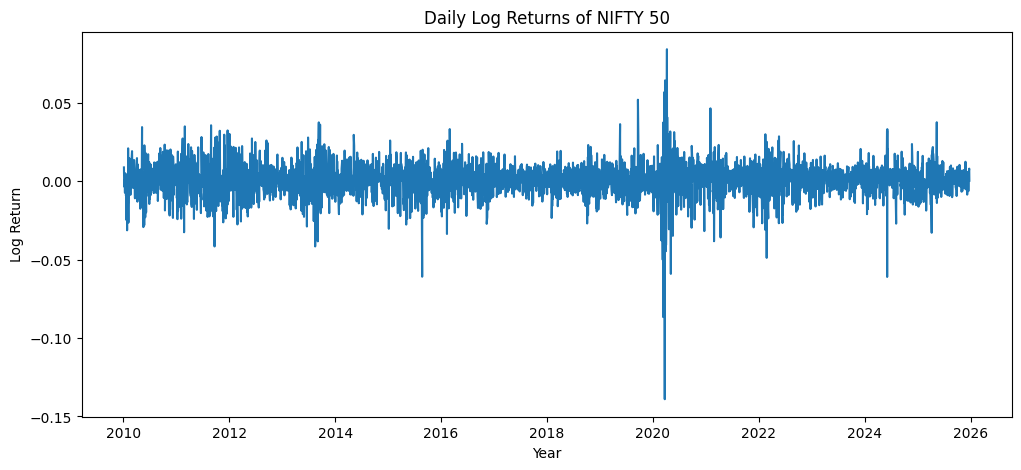

In [35]:
plt.figure(figsize=(12,5))
plt.plot(nifty.index, nifty['log_return'])
plt.title("Daily Log Returns of NIFTY 50")
plt.xlabel("Year")
plt.ylabel("Log Return")
plt.show()


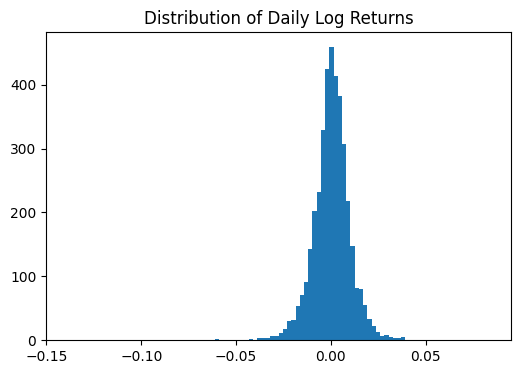

In [36]:
plt.figure(figsize=(6,4))
plt.hist(nifty['log_return'], bins=100)
plt.title("Distribution of Daily Log Returns")
plt.show()


# Distribution of Returns

Not normal

Fat tails

Extreme events exist

# Rolling Volatility (First Regime Feature)

In [37]:
# 20-day rolling volatility
nifty['volatility_20d'] = nifty['log_return'].rolling(window=20).std()

nifty.dropna(inplace=True)
nifty.head()


,price,log_return,volatility_20d
Date,,,
2010-02-02,4830.100098,-0.014307,0.010228
2010-02-03,4931.850098,0.020847,0.011324
2010-02-04,4845.350098,-0.017695,0.011713
2010-02-05,4718.649902,-0.026497,0.012716
2010-02-08,4760.399902,0.008809,0.013107


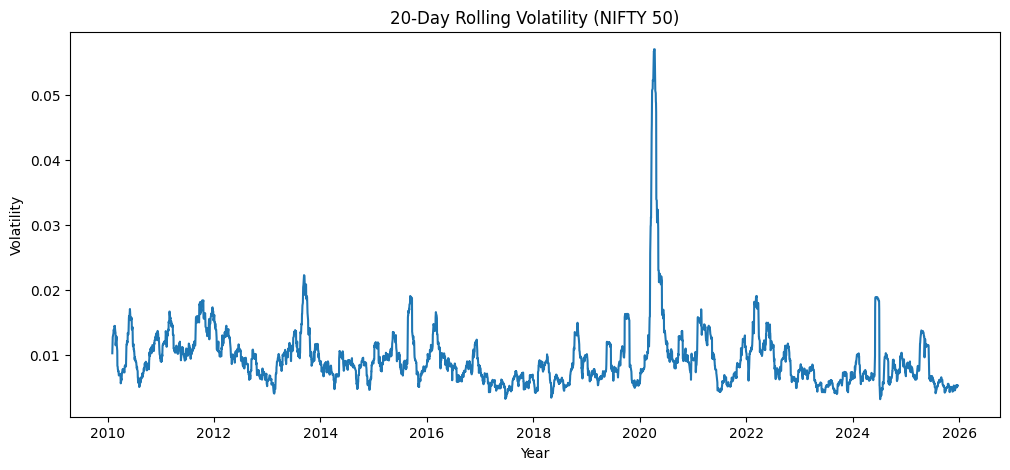

In [38]:
plt.figure(figsize=(12,5))
plt.plot(nifty.index, nifty['volatility_20d'])
plt.title("20-Day Rolling Volatility (NIFTY 50)")
plt.xlabel("Year")
plt.ylabel("Volatility")
plt.show()


## Feature 1: Rolling Mean Return (Trend Strength)

In [39]:
# 20-day rolling mean return
nifty['mean_return_20d'] = nifty['log_return'].rolling(window=20).mean()


## Feature 2: Rolling Volatility

This captures risk and fear

In [40]:
nifty['volatility_20d']


Date
2010-02-02    0.010228
2010-02-03    0.011324
2010-02-04    0.011713
2010-02-05    0.012716
2010-02-08    0.013107
                ...   
2025-12-17    0.005183
2025-12-18    0.005003
2025-12-19    0.005113
2025-12-22    0.005326
2025-12-23    0.005271
Name: volatility_20d, Length: 3904, dtype: float64

## Feature 3: Trend vs Price (Momentum Proxy)

Interpretation:

1 → above trend

<1 → below trend

In [42]:
# 50-day moving average of price
nifty['ma_50'] = nifty['price'].rolling(window=50).mean()


In [43]:
nifty['price_ma_ratio'] = nifty['price'] / nifty['ma_50']


In [44]:
nifty.dropna(inplace=True)


In [45]:
nifty.head()


,price,log_return,volatility_20d,mean_return_20d,ma_50,price_ma_ratio
Date,,,,,,
2010-04-19,5203.649902,-0.011265,0.007627,-0.000271,5086.877012,1.022956
2010-04-20,5230.100098,0.005070,0.007695,-0.000151,5094.877012,1.026541
2010-04-21,5244.899902,0.002826,0.007686,-0.000170,5101.138008,1.028182
2010-04-22,5269.350098,0.004651,0.007313,0.000612,5109.618008,1.031261
2010-04-23,5304.100098,0.006573,0.007401,0.000748,5121.327012,1.035689


In [46]:
nifty.describe()


,price,log_return,volatility_20d,mean_return_20d,ma_50,price_ma_ratio
count,3855.000000,3855.000000,3855.000000,3855.000000,3855.000000,3855.000000
mean,11940.687413,0.000416,0.009315,0.000413,11808.719743,1.010668
std,6203.497550,0.010453,0.004728,0.002379,6113.656028,0.041070
min,4544.200195,-0.139038,0.003161,-0.023106,4854.864990,0.667668
25%,6525.349854,-0.004760,0.006486,-0.000823,6234.547524,0.986504
50%,10211.799805,0.000588,0.008434,0.000540,10159.751992,1.015243
75%,17066.174805,0.006089,0.010836,0.001873,16951.756074,1.036350
max,26216.050781,0.084003,0.057000,0.009237,25874.062148,1.120800


In [48]:
# Save processed dataset for modeling
nifty.to_csv("C:/Users/Hemanshu/PycharmProjects/market_regime_detection/data/nifty_features.csv")
